In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles

from definitions import load_users_csv, load_caracteristics_csv


plt.rcParams.update(bundles.neurips2021(usetex=False))

data_users = load_users_csv()
data_caracteristics = load_caracteristics_csv()

#print(data_users.head())
#print(data_users[['Num_Acc', 'grav']].head())




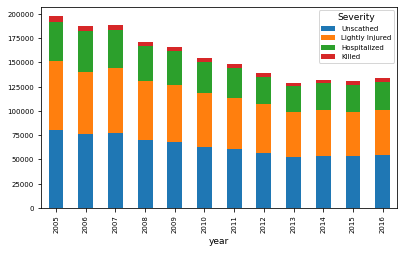

In [10]:
severity_by_year = pd.merge(data_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

#print(severity_by_year.head())

res = severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
#print(severity_by_year[['grav', 'an']].groupby(['an']))

res['an'] = res['an'] + 2000

#print(res.dtype)
#print(res.shape)

#res_frame.pivot(index='an', columns='grav')
#print(res_frame)
#print(res_frame.shape)
res = res.pivot(index='an', columns='grav', values=0)

#print(res)
res = res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
res.columns.name = 'Severity'

res.plot(kind='bar', stacked=True, xlabel='year')
plt.savefig('..//Plots//Accidents_per_year_and_severity.pdf', format='pdf')
plt.show()

In [1]:
import pandas as pd

print(pd.__version__)

1.4.0
